# Plotting Transfer Functions

**Roberto dos Reis**<br>
Northwestern University


Calculate CTEM bright field phase contrast transfer function with partial coherence for weak phase objects


**References:** <br>
R.H. Wade, J. Frank, Optik, 49 (1977), p. 81
Ishizuka, K., 1980. Contrast transfer of crystal images in TEM. Ultramicroscopy, 5(1-3), pp.55-65.

### Load necessary packages:

In [12]:
# Numeric operations
import numpy as np

# Visualization / Plotting
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# for math functions
import scipy.special as sp
from scipy.interpolate import interp1d

# for complex numbers operations
import cmath 
import math 


# Ensure that images are rendered in this notebook:
%matplotlib inline

## Input microscope parameters

In [13]:
def ctemh(k,params, type):
    Cs3 = params[0]*1.0e7
    Cs5 = params[1]*1.0e7
    df = params[2]
    kev = params[3]
    ddf = params[4]
    beta = params[5]*0.001
    mo = 511.0 # electron rest mass in keV
    hc = 12.3986 # in keV-Angstroms
    wav = (2*mo)+kev;
    wav = hc/np.sqrt(wav*kev)
    wavsq = wav*wav;
    
    w1 = np.pi*Cs3*wavsq*wav
    w2 = np.pi*wav*df;
    w3 = np.pi*Cs5*wavsq*wavsq*wav
    e0 = (np.pi*beta*ddf)**2
    k2 = k*k
    
    wr = ((w3*k2+w1)*k2-w2)*k*beta/wav
    wi = np.pi*wav*ddf*k2
    wi = wr*wr + 0.25*wi*wi
    wi = np.exp(-wi/(1+e0*k2))
    wr = w3*(1-2.0*e0*k2)/3.0
    wr = wr*k2 + 0.5*w1*(1-e0*k2)
    wr = (wr*k2 - w2)*k2/(1+e0*k2);
    if type == 0:
        y = np.sin(wr)* wi
    else:
        y = np.cos(wr)* wi
        
    return y

### Calculate CTEM Transfer functions

Cs3,5 = Spherical Aberrations<br>
df = defocus<br>
kev = electron energy in keV<br>
ddf = chromatic aberation defocus spread<br>
beta =  spread in illumination angles<br>

In [14]:
print( 'Plot CTEM transfer function' )
kev= float(input( 'Type electron energy in keV :'))
Cs3= float(input( 'Type spherical aberation Cs3 in mm :'))
Cs5= float(input( 'Type spherical aberation Cs5 in mm :'))
df= float(input( 'Type defocus df in Angstroms :'))
ddf= float(input( 'Type defocus spread ddf in Angstroms :'))
beta= float(input( 'Type illumination semiangle in mrad :'))
type= float(input( 'Type 0 for phase contrast, 1 for amplitude:' ))

Plot CTEM transfer function
Type electron energy in keV :


ValueError: could not convert string to float: 

In [15]:
# electron wavelength
wav = 12.3986/np.sqrt((2*511.0 + kev)*kev);
ds = np.sqrt(np.sqrt(Cs3*1.0e7*wav*wav*wav ));

kmax = 2.5/ds;
k = np.linspace(0, kmax, num=500)

params = [Cs3, Cs5, df, kev, ddf, beta ];
sinw = ctemh(k, params,type);

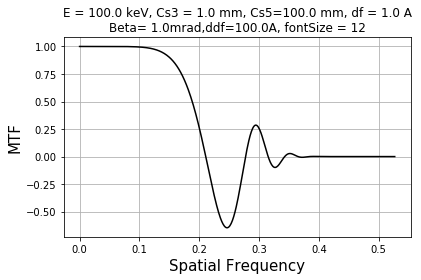

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
plt_handle = ax.plot(k,sinw, 'k')
ax.set_title(f'E = {params[3]} keV, Cs3 = {params[0]} mm, Cs5={params[3]} mm, df = {params[2]} A'
             +"\n"+
            f'Beta= {params[5]}mrad,ddf={params[3]}A, fontSize = 12')

ax.set_ylabel(r'MTF', fontsize=15)
ax.set_xlabel(r'Spatial Frequency', fontsize=15)
# ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()
plt.show()

## Reading file containing atomic positions

Create atomic coordinates for use in multislice simulation.

In [11]:
cellDim = [26.877129, 27.15, 5.43]

filename = 'Si_7x5.dat'
atoms = np.loadtxt(filename, delimiter=',')

print (atoms)

[[14.        0.        0.        0.        1.        0.      ]
 [14.        0.        1.3575    0.        1.        0.      ]
 [14.        1.919795  2.715     0.        1.        0.      ]
 ...
 [14.       23.037539 23.0775    2.715     1.        0.      ]
 [14.       24.957334 24.435     2.715     1.        0.      ]
 [14.       24.957334 25.7925    2.715     1.        0.      ]]
